In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pspec_3D
import astropy.units as units
from matplotlib.colors import LogNorm
from astropy.cosmology import Planck18 as cosmo
plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = (10,7)

In [2]:
from uvtools.dspec import gen_window

In [3]:
# loading in Nick's data cube
filt_im = np.load('ZW2.msn_image_sincfilt.npz')
filt_im.files

['freqs', 'dx', 'dy', 'dz', 'data', 'resid', 'history']

In [4]:
data = filt_im['data']
resid = filt_im['resid']

In [5]:
data.shape

(256, 256, 200)

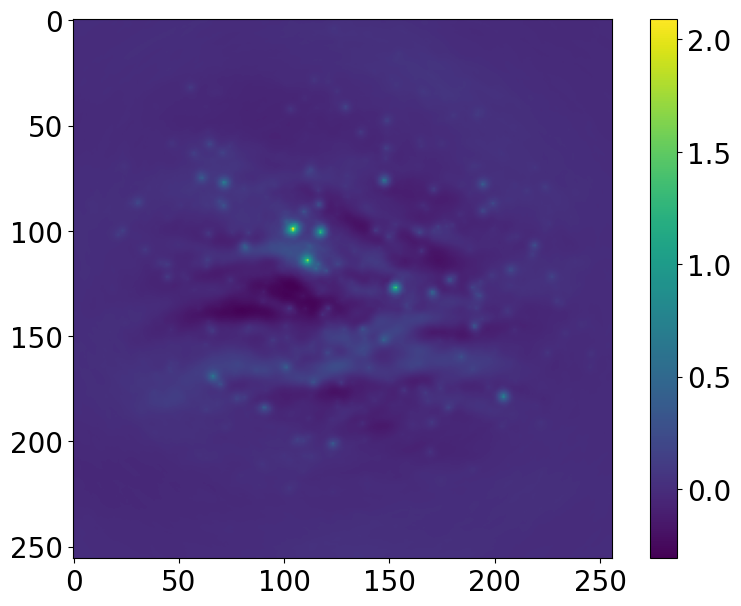

In [6]:
plt.imshow(data[:,:,0])
plt.colorbar()
plt.show()

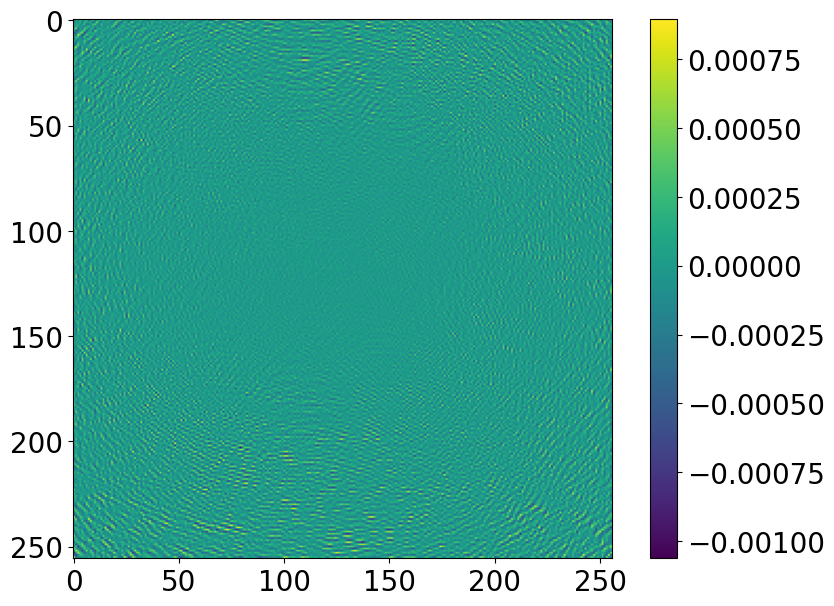

In [7]:
plt.imshow(resid[:,:,0])
plt.colorbar()
plt.show()

## Setting parameters of observation

In [8]:
freqs = filt_im['freqs']
mid_freq = freqs[len(freqs)//2]
rest_freq = 1420*(1e6)

z_mid = (rest_freq / mid_freq) - 1

#length and width of the box in Mpc
Lx = 1.47e3
Ly = 1.47e3
theta_x = Lx/(cosmo.comoving_distance(z_mid).value)
theta_y = Ly/(cosmo.comoving_distance(z_mid).value)

## Power Spectra for filtered data/original data

In [11]:
pspec_3d_filt = pspec_3D.Power_Spectrum(data = resid,
                                    theta_x=theta_x,
                                    theta_y = theta_y,
                                    freqs = freqs)

pspec_1d_filt = pspec_3d_filt.compute_1D_pspec(dimensionless=True)
kpar, kperp, pspec_cyl_filt = pspec_3d_filt.compute_2D_pspec()

In [12]:
pspec_3d_filt_BH = pspec_3D.Power_Spectrum(data = resid,
                                    theta_x=theta_x,
                                    theta_y = theta_y,
                                    freqs = freqs,
                                    freq_taper='blackmanharris',
                                    space_taper='blackmanharris')

pspec_1d_filt_BH = pspec_3d_filt_BH.compute_1D_pspec(dimensionless=True)
kpar, kperp, pspec_cyl_filt_BH = pspec_3d_filt_BH.compute_2D_pspec()

In [13]:
pspec_3d_dat = pspec_3D.Power_Spectrum(data = data,
                                   theta_x = theta_x,
                                   theta_y = theta_y,
                                   freqs = freqs)

pspec_1d_dat = pspec_3d_dat.compute_1D_pspec(dimensionless=True)
kpar, kperp, pspec_cyl_dat = pspec_3d_dat.compute_2D_pspec()

In [14]:
pspec_3d_dat_BH = pspec_3D.Power_Spectrum(data = data,
                                    theta_x = theta_x,
                                    theta_y = theta_y,
                                    freqs = freqs,
                                    freq_taper='blackmanharris',
                                    space_taper='blackmanharris')

pspec_1d_dat_BH = pspec_3d_dat_BH.compute_1D_pspec(dimensionless=True)
kpar, kperp, pspec_cyl_dat = pspec_3d_dat_BH.compute_2D_pspec()

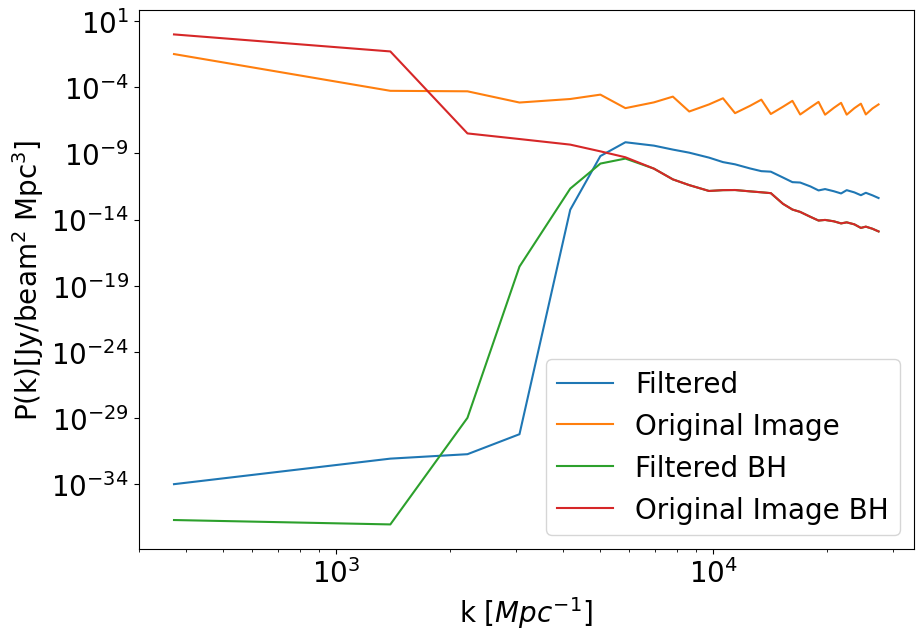

In [16]:
plt.loglog(pspec_1d_filt[0], pspec_1d_filt[1], label='Filtered')
plt.loglog(pspec_1d_dat[0], pspec_1d_dat[1], label='Original Image')
plt.loglog(pspec_1d_filt_BH[0], pspec_1d_filt_BH[1], label='Filtered BH')
plt.loglog(pspec_1d_dat_BH[0], pspec_1d_dat_BH[1], label='Original Image BH')
plt.legend()
plt.xlabel('k $[Mpc^{-1}]$')
plt.ylabel(r'P(k)[Jy/beam$^2$ Mpc$^3$]')
plt.savefig('1D_pspec.png', dpi=500)
plt.show()

In [ ]:
plt.loglog(pspec_1d_filt[0], dimensionless_filt, label='Filtered')
plt.loglog(pspec_1d_dat[0], dimensionless_dat, label='Original Data')
plt.legend()
plt.xlabel('k $[Mpc^{-1}]$')
plt.ylabel(r'$\frac{k^3}{4\pi}$P(k)')
plt.title('Dimensionless')
plt.show()

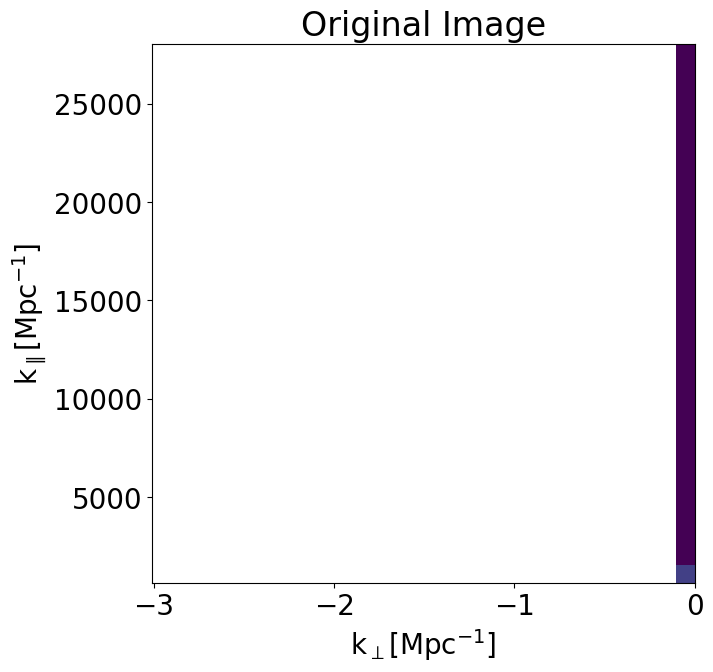

In [17]:
plt.figure(figsize=(7,7))
plt.pcolor(kperp, kpar, pspec_cyl_dat,
                norm=LogNorm(vmin=1e-6, vmax=10),
                shading='auto')
#plt.colorbar(label = 'P(k$_\parallel$,k$_{\perp}$)[Jy/beam$^2$ Mpc$^3$]') 
plt.ylabel('k$_\parallel$[Mpc$^{-1}]$')
plt.xlabel('k$_\perp$[Mpc$^{-1}]$')
plt.title('Original Image')
plt.savefig('2D_pspec.png', dpi=500)
plt.show()

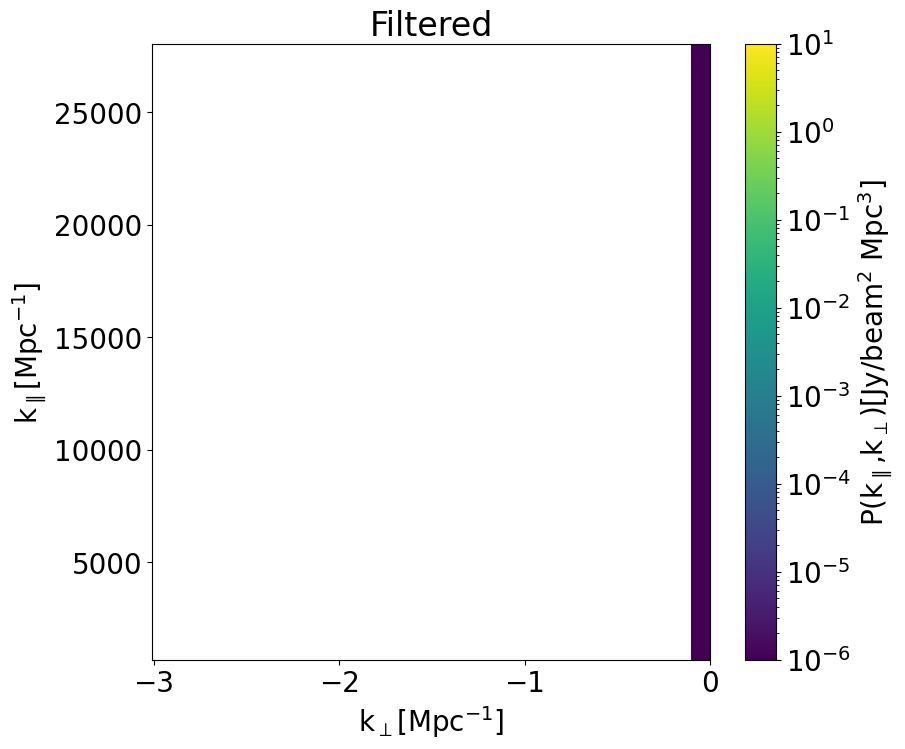

In [18]:
plt.figure(figsize=(9,8))
plt.pcolor(kperp, kpar, pspec_cyl_filt,
                norm=LogNorm(vmin=1e-6, vmax=10),
                shading='auto')
plt.colorbar(label = 'P(k$_\parallel$,k$_{\perp}$)[Jy/beam$^2$ Mpc$^3$]') 
plt.ylabel('k$_\parallel$[Mpc$^{-1}]$')
plt.xlabel('k$_\perp$[Mpc$^{-1}]$')
plt.title('Filtered')
plt.savefig('2D_pspec_filt.png', dpi=500)
plt.show()

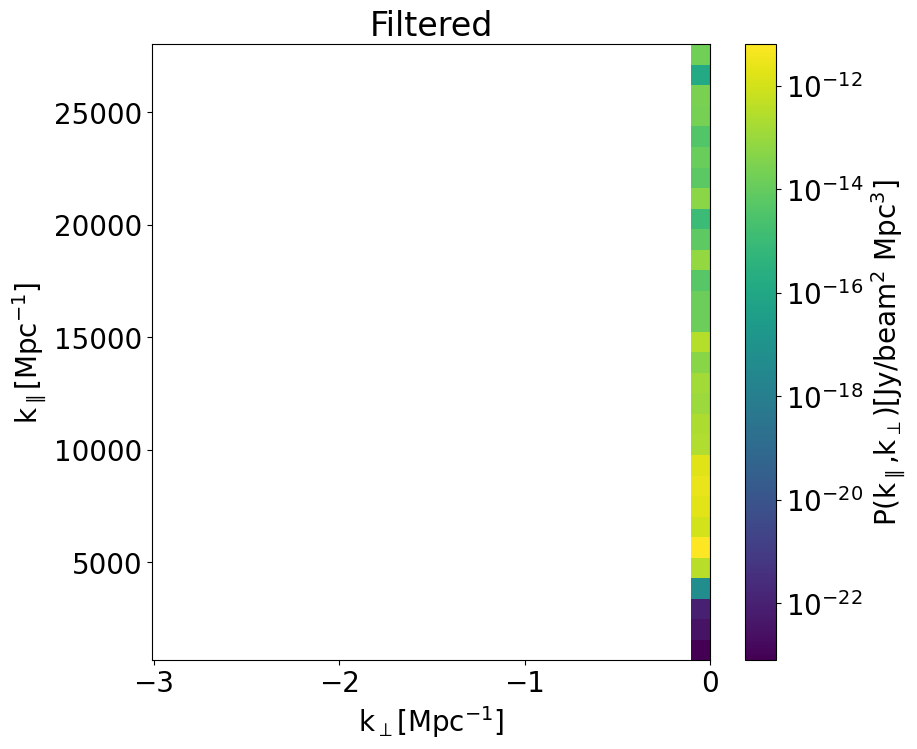

In [20]:
plt.figure(figsize=(9,8))
plt.pcolor(kperp, kpar, pspec_cyl_filt,
                norm=LogNorm(),
                shading='auto')
plt.colorbar(label = 'P(k$_\parallel$,k$_{\perp}$)[Jy/beam$^2$ Mpc$^3$]') 
plt.ylabel('k$_\parallel$[Mpc$^{-1}]$')
plt.xlabel('k$_\perp$[Mpc$^{-1}]$')
plt.title('Filtered')
plt.savefig('2D_pspec_filt.png', dpi=500)
plt.show()

0.01 mK ~ 0.005 Jy/beam for us?

### Ratio

In [ ]:
ratio = pspec_cyl_filt/pspec_cyl_dat

plt.pcolor(kperp, kpar, ratio,
                norm=LogNorm(),
                shading='auto')
plt.colorbar(label = r'P$_{resid}$/P$_{data}$') 
plt.ylabel('k$_\parallel$[Mpc$^{-1}]$')
plt.xlabel('k$_\perp$[Mpc$^{-1}]$')
plt.title('Ratio')
plt.savefig('2D_pspec_ratio.png', dpi=500)
plt.show()